In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

In [83]:
tf.keras.models
tf.keras.layers
tf.keras.optimizers

<module 'tensorflow.keras.models' from 'c:\\Users\\k26ra\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\keras\\_tf_keras\\keras\\models\\__init__.py'>

<module 'tensorflow.keras.layers' from 'c:\\Users\\k26ra\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\keras\\_tf_keras\\keras\\layers\\__init__.py'>

<module 'tensorflow.keras.optimizers' from 'c:\\Users\\k26ra\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\keras\\_tf_keras\\keras\\optimizers\\__init__.py'>

In [112]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError

In [8]:
def generate_noisy_data(func, X_range, deviation):
  X = np.arange(X_range[0], X_range[1]+1).astype(float)
  y_original = func(X)
  y_noised = np.array([y - y * np.random.choice([np.random.uniform(-deviation, 0), np.random.uniform(0, deviation)])
                      for y in y_original])
  return X, y_original, y_noised

In [36]:
def plot_noised_data(X, y_original, y_noised):
  plt.scatter(X, y_noised, label='Noised y')
  plt.plot(X, y_original, 'r', label='Original y')
  plt.title("Scatter plot of Noised y against Original y")
  plt.xlabel("X values")
  plt.ylabel("y values")
  plt.legend()
  plt.show()

In [85]:
def calculate_loss(y_original, y_noised):
  mae = mean_absolute_error(y_original, y_noised)
  mse = mean_squared_error(y_original, y_noised)
  print("Mean Absolute Error (MAE):", mae)
  print("Mean Squared Error (MSE):", mse)

In [76]:
def polynomial_function(degree):
  def polynomial_function(X):
    coefficients = [1] * (degree + 1)
    result = sum(coefficient * X ** power for power,
                 coefficient in enumerate(coefficients))
    return result
  return polynomial_function


X = np.array([5])
print("Linear function:", polynomial_function(1)(X))
print("Quadratic function:", polynomial_function(2)(X))
print("Cubic function:", polynomial_function(3)(X))

Linear function: [6]
Quadratic function: [31]
Cubic function: [156]


In [70]:
def linear_function(X):
  return X * 3


def quadratic_function(X):
  return X**2 + 2*X + 5


def cubic_function(X):
  return X**3 + 4*X**2 + 3*X + 10

Mean Absolute Error (MAE): 7.49808324894265
Mean Squared Error (MSE): 104.95864991162018


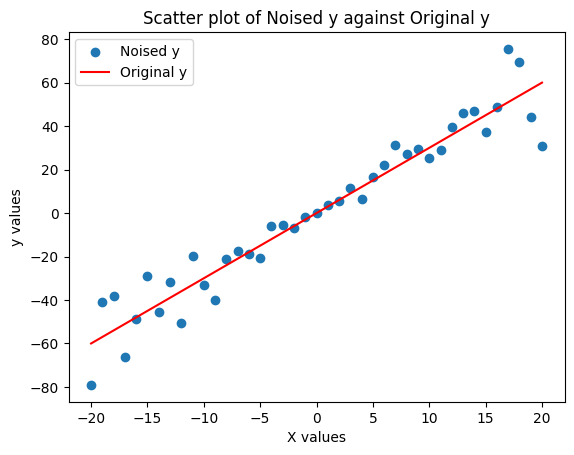

In [186]:
X, y_original, y_noised = generate_noisy_data(
    linear_function, (-20, 20), 0.5)
calculate_loss(y_original, y_noised)
plot_noised_data(X, y_original, y_noised)

In [160]:
def build_polynomial_model(lr, degree):
  model = Sequential([
      Input(shape=(degree + 1,)),
      Dense(units=1)
  ])
  model.compile(optimizer=RMSprop(learning_rate=lr),
                loss=MeanSquaredError(),
                metrics=[RootMeanSquaredError()])
  return model

In [162]:
def polynomial_feature_transform(X, degree):
  poly = PolynomialFeatures(degree=degree, include_bias=True)
  X_poly = poly.fit_transform(X.reshape(-1, 1))
  return X_poly

In [183]:
def plot_regression_results(X, y_noised, y_pred):
  plt.figure(figsize=(10, 6))
  plt.scatter(X, y_noised, color='blue', label='Noised y')
  plt.plot(X, y_pred, color='red', label='Predicted y')
  plt.xlabel('X')
  plt.ylabel('y')
  plt.title('Scatter Plot of Noised y and Predicted y')
  plt.legend()
  plt.grid(True)
  plt.show()

In [184]:
def plot_loss_curve(history):
  plt.figure(figsize=(10, 6))
  plt.plot(history.history['loss'], color='blue', label='Training Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.title('Training Loss Curve')
  plt.legend()
  plt.grid(True)
  plt.show()

In [200]:
def polynomial_regression(X, y, degree=1, lr=0.1, epochs=50, batch_size=1):
  X_poly = polynomial_feature_transform(X, degree)

  model = build_polynomial_model(lr=lr, degree=degree)
  history = model.fit(X_poly, y, epochs=epochs, batch_size=len(y)*batch_size)
  y_pred = model.predict(X_poly)

  plot_loss_curve(history)
  plot_regression_results(X, y, y_pred)

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step - loss: 496.8566 - root_mean_squared_error: 22.2903
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 361.4089 - root_mean_squared_error: 19.0108
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 288.9472 - root_mean_squared_error: 16.9984
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 241.2324 - root_mean_squared_error: 15.5317
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 207.2368 - root_mean_squared_error: 14.3957
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 182.0544 - root_mean_squared_error: 13.4928
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 163.0108 - root_mean_squared_error: 12.7676
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 148.4588 - root_mean_squared_error: 12.1844
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 137.2969 - root_mean_squared_error: 11.7174
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 128.7437 - root_mean_squared_err

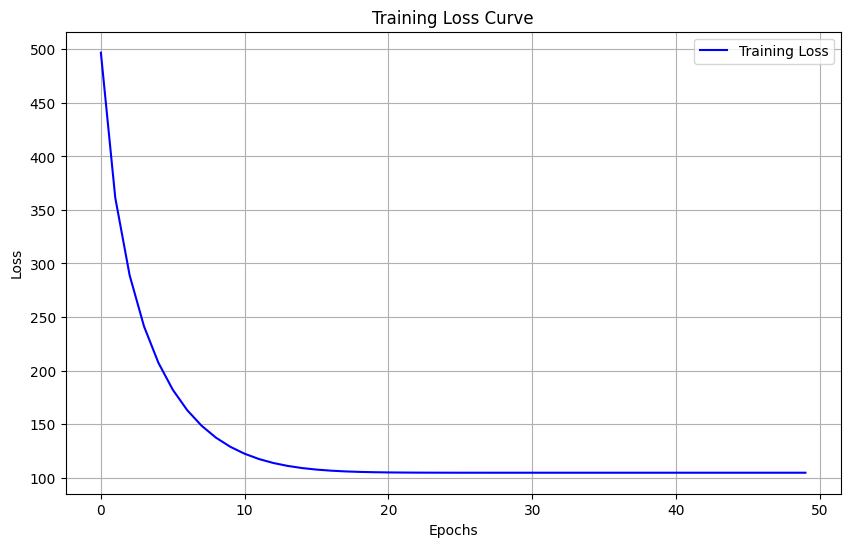

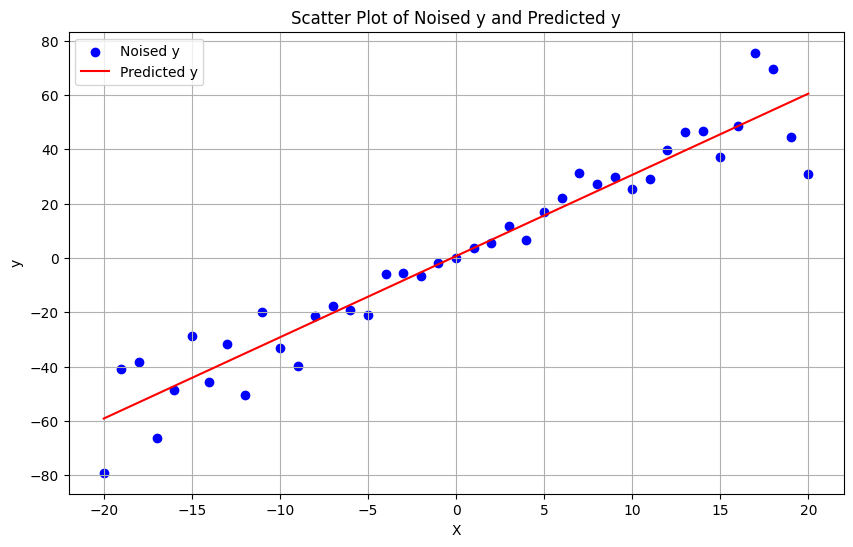

In [201]:
polynomial_regression(X, y_noised)

In [119]:
def build_model(lr):
  model = Sequential([
      Input(shape=(1,)),
      Dense(units=1)
  ])
  model.compile(optimizer=RMSprop(learning_rate=lr),
                loss="mean_squared_error", metrics=[RootMeanSquaredError()])
  return model

In [120]:
def train_model(model, X, y, epochs, batch_size):
  history = model.fit(x=X, y=y, epochs=epochs,
                      batch_size=batch_size)

  trained_weight = model.get_weights()[0][0]
  trained_bias = model.get_weights()[1]
  epochs = history.epoch
  rmse = pd.DataFrame(history.history)['root_mean_squared_error']

  return trained_weight, trained_bias, epochs, rmse

In [154]:
def plot_the_model(trained_weight, trained_bias, X, y_noised):
  plt.scatter(X, y_noised)

  # x0 = 0
  # y0 = trained_bias
  # x1 = X[-1]
  # y1 = trained_bias + (trained_weight * x1)

  # plt.plot([x0, x1], [y0, y1], 'g')
  plt.plot(X, trained_bias + (trained_weight * X), 'g')
  # plt.plot(X, y_original, 'r')
  plt.show()

In [122]:
def plot_the_loss_curve(epochs, rmse):
  plt.plot(epochs, rmse, label="Loss")

  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.legend()
  plt.show()

Epoch 1/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step - loss: 160351322112.0000 - root_mean_squared_error: 400438.9062
Epoch 2/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 147796017152.0000 - root_mean_squared_error: 384442.4688
Epoch 3/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 139328667648.0000 - root_mean_squared_error: 373267.5625
Epoch 4/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 132606984192.0000 - root_mean_squared_error: 364152.4375
Epoch 5/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 126904205312.0000 - root_mean_squared_error: 356236.1562
Epoch 6/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 121886908416.0000 - root_mean_squared_error: 349123.0625
Epoch 7/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 117370732544.0000 - root_mean_squared_error: 342594.1250
Epoch 8/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 113241653248.0000 - root_mean_squared_error: 336513.9688
Epoch 9/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 109423747072.0000 - root_mean_

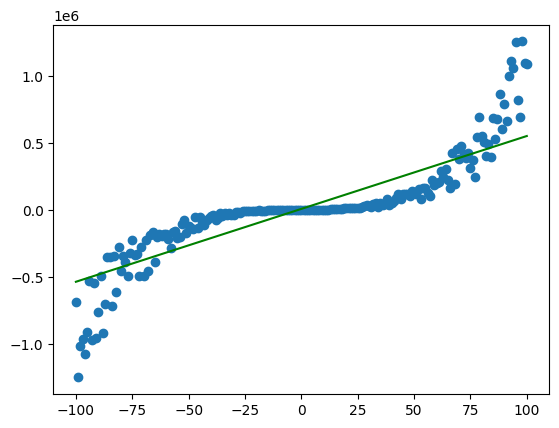

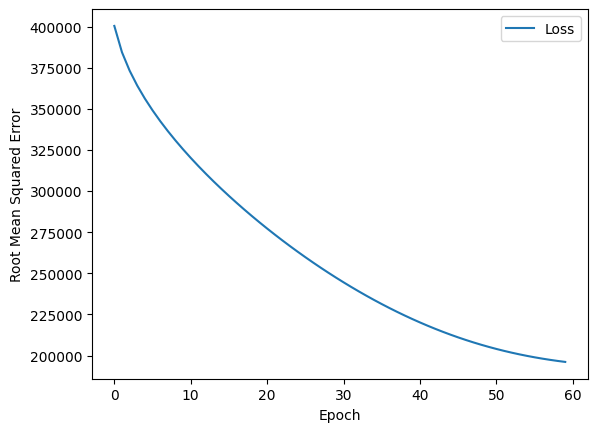

57896.9236420557

1377665227.7703328

In [161]:
from sklearn.metrics import mean_absolute_error

lr = 100.
epochs = 60
batch_size = len(y_noised)

model = build_model(lr)
trained_weight, trained_bias, epochs, rmse = train_model(
    model, X, y_noised, epochs, batch_size)
plot_the_model(trained_weight, trained_bias, X, y_noised)
plot_the_loss_curve(epochs, rmse)

mean_absolute_error(y_original, y_noised)
mean_absolute_error(y_original, (y_original * trained_weight) + trained_bias)